In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from PorousMediaLab import PorousMediaLab
import numpy as np
%matplotlib inline

In [2]:
tend = 24 ## hours
dt = 1
dx = 0.5 ## cm
L = 40 ## cm
x = np.linspace(0, L, L / dx + 1)
t = np.linspace(0, tend, round(tend / dt) + 1)
phi = ( 0.98 - 0.7 ) * np.exp( -x / 20 ) + 0.7

In [3]:
ftc = PorousMediaLab(L, dx, tend, dt, phi)

In [4]:
C_init=0.01
ftc.add_species(is_solute=True, element='H2CO3', D=1e-5*60*60, init_C=C_init, bc_top=0., bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='HCO3', D=1e-5*60*60, init_C=C_init, bc_top=0., bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='CO3', D=1e-5*60*60, init_C=C_init, bc_top=0., bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='H3PO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='H2PO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='HPO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='PO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')


ftc.add_acid_base_equilibrium(species=['H2CO3', 'HCO3', 'CO3'], pKa=[3.6, 10.32])
ftc.add_acid_base_equilibrium(species=['H3PO4', 'H2PO4', 'HPO4', 'PO4'], pKa=[2.148, 7.198, 12.319])

In [5]:
ftc.solve()

Simulation starts  with following params:
	tend = 24.0,
	dt = 1.00e+00,
	L = 40.0,
	dx = 5.00e-01,
	w = 0.00
Simulation started:
	 2017-08-10 13:04:09


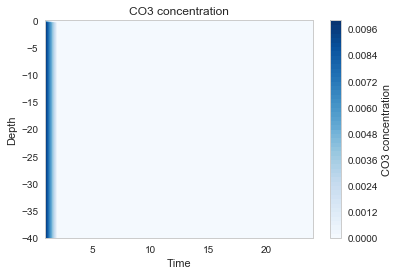

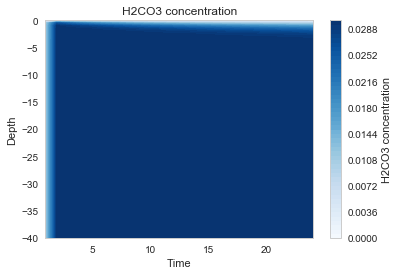

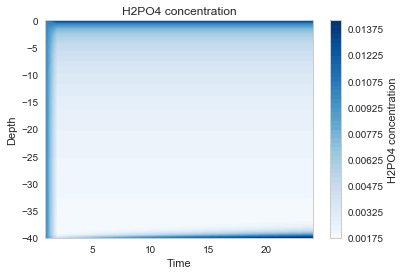

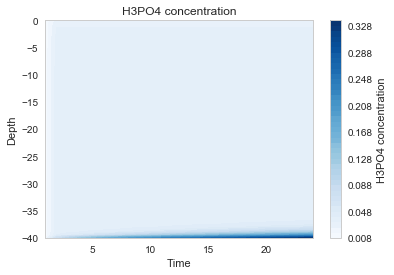

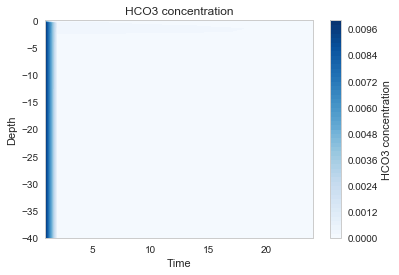

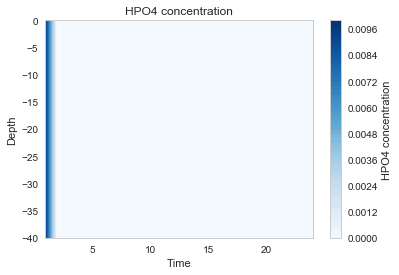

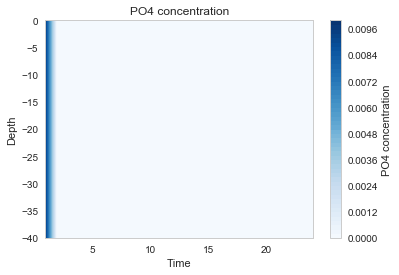

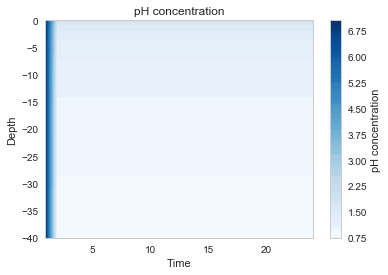

In [6]:
ftc.plot_contourplots(labels=False)

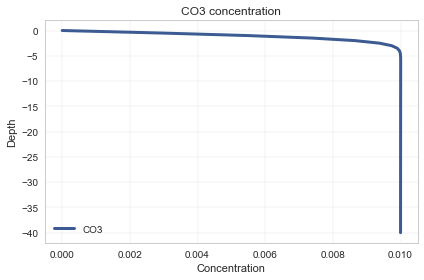

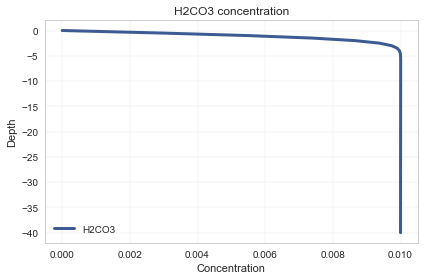

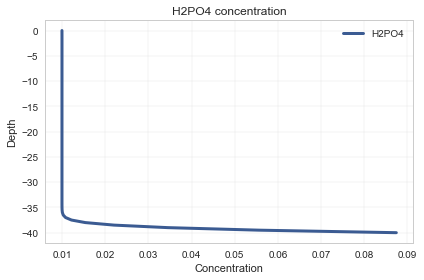

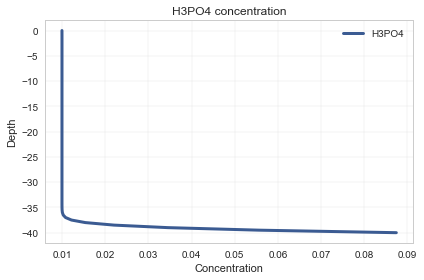

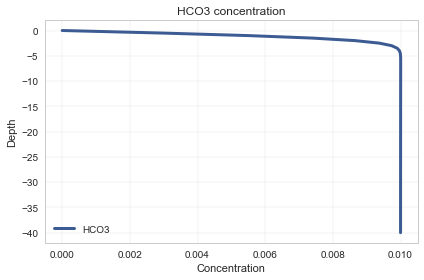

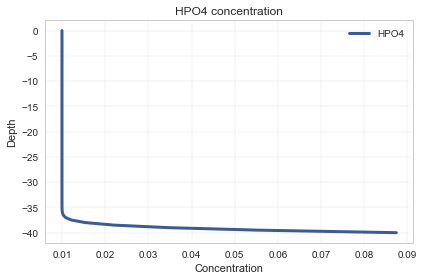

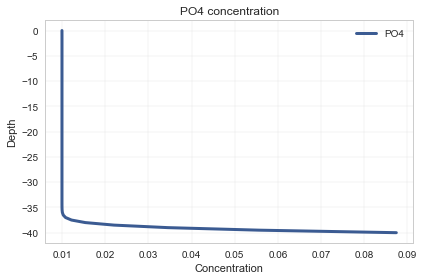

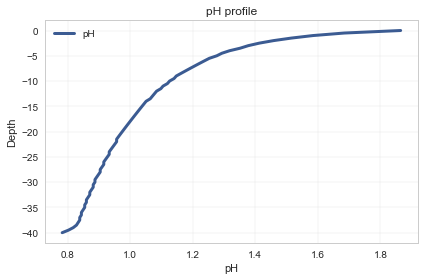

In [11]:
ftc.plot_profiles()

In [8]:
from pHcalc.pHcalc import Acid, Neutral, System

In [9]:
# def test():
g=7.0
system = System()
carbonic = Acid(pKa=[3.6, 10.32], charge=0, conc=1e-3)
ca = Neutral(charge=2, conc=5e-4)
system = System(carbonic, ca)
system.pHsolve(guess=g, tol=1e-1)
g = system.pH 
print(system.pH)

7.0
